In [1]:
import pandas as pd
import numpy as np

np.random.seed(1234)
X = np.random.randn(100, 2)  # 100개 샘플, 2개 특징
y = (X[:, 0] * X[:, 1] > 0).astype(int)  # 간단한 선형 분류 문제

df = pd.DataFrame(X, columns=["feature1", "feature2"])
df["label"] = y

df

,feature1,feature2,label
0,0.471435,-1.190976,0
1,1.432707,-0.312652,0
2,-0.720589,0.887163,0
3,0.859588,-0.636524,0
4,0.015696,-2.242685,0
...,...,...,...
95,0.209395,-0.592886,0
96,-1.473116,-0.896581,1
97,1.104352,-0.431550,0
98,-0.161137,0.889157,0


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[["feature1", "feature2"]],
    df["label"],
    test_size=0.2,
    random_state=1234
)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

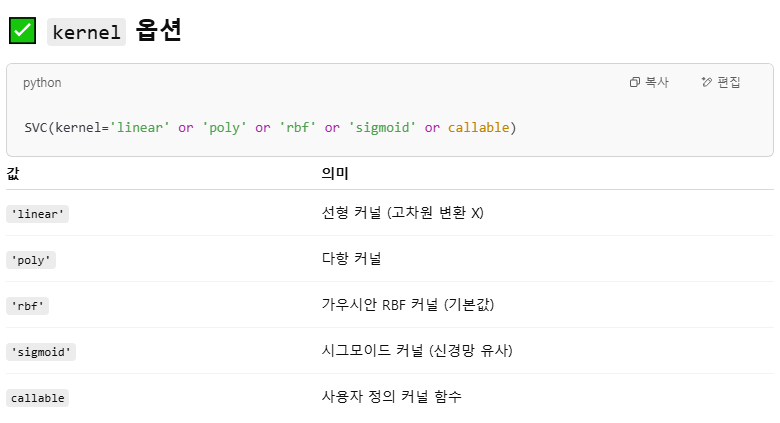
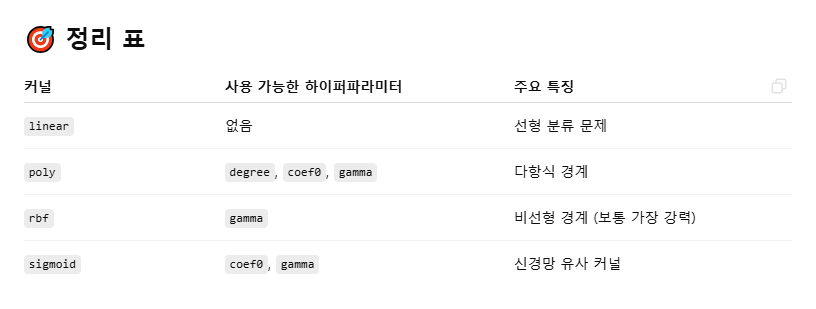

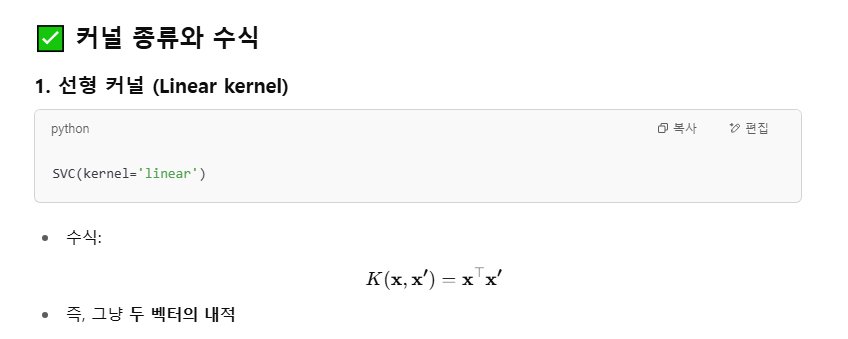
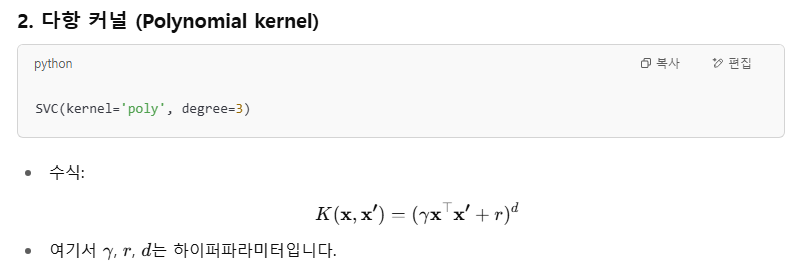
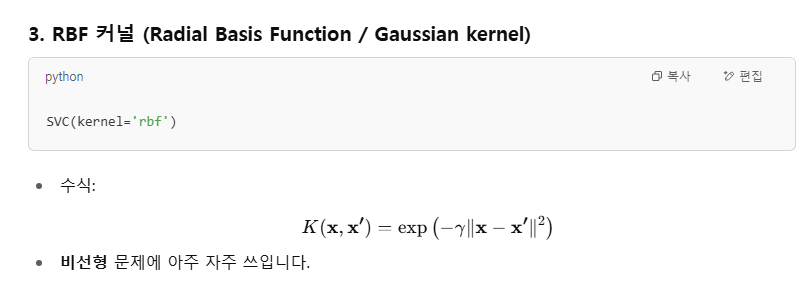
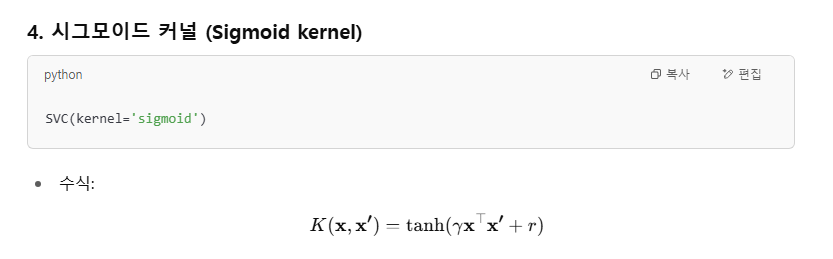

In [32]:
# SVM 모델 학습
from sklearn.svm import SVC

# 커널 함수 K
# K = (0.1 * (x1.T x2) + 0.0001)^2
model = SVC(kernel='poly', gamma=0.1, coef0=0.001, degree=2)

# K = (0.2 * (x1.T x2) + 0.3)^3
# model = SVC(kernel='poly', gamma=0.2, coef0=0.3, degree=3)

# K = exp(-0.1 * ||x1.T x2||^2)
# model = SVC(kernel='rbf', gamma=0.1)

# K = tanh(x1.T x2 + 0.01)
# model = SVC(kernel='sigmoid', gamma=1, coef0=0.01, degree=2)

model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.001,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
# 예측
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [34]:
# 평가
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))

# pos_label=1 => 1이 양성 클래스라고 간주 (default)
print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))

Accuracy : 0.65
Recall : 0.125
Precision : 1.0
F1 Score: 0.2222222222222222
